In [61]:
#open new data dase file
import plotly
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [62]:
traid_data = pd.read_csv('/Users/papaskakun/Desktop/GIT/Project_traiding/Data/mark_1.csv',
                          header=0, 
                         names = ['Date', 'Name',
                                  'Type', 'Open_price',
                                  'Value','Close price','Reasons', 'Step',
                                  'Step price', 'Delta','Total'],                       
                         sep = ';')
traid_data

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total
0,7.10.2021,Si-12.21,лонг,73098,1,72544,Stop,1,1,-554,99446
1,12.10.2021,Si-12.21,лонг,72831,1,72544,Stop,1,1,-287,99159
2,14.10.2021,BR-11.21,лонг,"83,98",1,"84,66",не внимательно указала цифру выхода,"0,01","7,09","481,94","99640,94"
3,14.10.2021,GAZR-12.21,лонг,37342,2,37518,Take,1,1,352,"99992,94"
4,15.10.2021,BR-11.21,лонг,"84,77",1,"85,79",расчет был на большую шпильку в начале недели,"0,01","7,09","722,91","100715,85"
...,...,...,...,...,...,...,...,...,...,...,...
354,28.10.2022,GOLD-12.22,шорт,1745,1,"1753,9",Stop,"0,1","6,09","-541,9","23842,26"
355,28.10.2022,GOLD-12.22,шорт,1773,1,"1771,3",Take,"0,1","6,13","104,23","23946,49"
356,28.10.2022,GOLD-12.22,шорт,1771,1,"1771,3",Stop,"0,1","6,13","-18,39","23928,1"
357,28.10.2022,GOLD-12.22,шорт,1780,1,"1780,5",Stop,"0,1","6,13","-30,66","23897,44"


In [63]:
traid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         359 non-null    object
 1   Name         359 non-null    object
 2   Type         359 non-null    object
 3   Open_price   359 non-null    object
 4   Value        359 non-null    int64 
 5   Close price  359 non-null    object
 6   Reasons      359 non-null    object
 7   Step         359 non-null    object
 8   Step price   359 non-null    object
 9   Delta        359 non-null    object
 10  Total        359 non-null    object
dtypes: int64(1), object(10)
memory usage: 31.0+ KB


In [64]:
# replace ','
traid_data['Delta'] = traid_data['Delta'].str.replace(',', '.')
traid_data['Delta'] = traid_data['Delta'].astype('float')
# replace in Total
traid_data['Total'] = traid_data['Total'].str.replace(',', '.')
traid_data['Total'] = traid_data['Total'].astype('float')
# replace in Open
traid_data['Open_price'] = traid_data['Open_price'].str.replace(',', '.')
traid_data['Open_price'] = traid_data['Open_price'].astype('float')
# replace Close 
traid_data['Close price'] = traid_data['Close price'].str.replace(',', '.')
traid_data['Close price'] = traid_data['Close price'].astype('float')

In [65]:
#
# change type of Date column to datetime format
traid_data['Date'] = pd.to_datetime( traid_data['Date'], dayfirst=True)

# creatde new sign to compose date by mounth
traid_data['MonthSale'] = traid_data['Date'].dt.month
traid_data['YearSale'] = traid_data['Date'].dt.year

# research info about mounth
traid_data['MonthSale'].value_counts()


2     59
7     49
10    40
5     39
1     35
8     28
12    26
11    25
4     25
9     21
3     12
Name: MonthSale, dtype: int64

In [66]:
traid_data[traid_data['YearSale'] == 2021]

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total,MonthSale,YearSale
0,2021-10-07,Si-12.21,лонг,73098.00,1,72544.00,Stop,1,1,-554.00,99446.00,10,2021
1,2021-10-12,Si-12.21,лонг,72831.00,1,72544.00,Stop,1,1,-287.00,99159.00,10,2021
2,2021-10-14,BR-11.21,лонг,83.98,1,84.66,не внимательно указала цифру выхода,"0,01","7,09",481.94,99640.94,10,2021
3,2021-10-14,GAZR-12.21,лонг,37342.00,2,37518.00,Take,1,1,352.00,99992.94,10,2021
4,2021-10-15,BR-11.21,лонг,84.77,1,85.79,расчет был на большую шпильку в начале недели,"0,01","7,09",722.91,100715.85,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2021-12-21,BRF2,лонг,71.35,1,73.28,Take,"0,01","7,39",1427.06,108205.94,12,2021
61,2021-12-24,BRF2,лонг,76.25,1,77.18,Take,"0,01","7,35",683.28,108889.22,12,2021
62,2021-12-24,SPYF-3.22,шорт,461.12,1,470.02,Stop,"0,01","0,76",-674.06,108215.16,12,2021
63,2021-12-28,RTS-03-22,лонг,157240.00,1,160600.00,маркет кончился срок,10,"14,69",4937.23,113152.39,12,2021


In [67]:
# display dinamic of balance
fig = px.line(
    traid_data,
    x='Date',
    y='Total',
    #color="continent",
    #line_group="country",
    #hover_name="country",
    #line_shape="spline",
    render_mode="svg")
fig.show();

In [68]:
#
l_year = traid_data[traid_data['YearSale']== 2021]
l_year = l_year.groupby('MonthSale')['Value'].count()
display(l_year)

MonthSale
10    14
11    25
12    26
Name: Value, dtype: int64

In [69]:
fig = px.histogram(l_year,
                   x=l_year.index,
                   y = ['Value'],
                   nbins=3,
                   title="Количесво взятых контрактов по месяцам",
                   #hover_data = ['Value']
                   #labels={'x':'Number of Month', 'y':'counts of Contracts'}
                  )
fig.update_layout(hovermode="x unified") # Указываем что подскзку показываем сразу для всех элементов 
                                         # в разрезе по оси X. По мне просто бомба для этого графика, 
                                         # особенно для 4 колонки, где непонятно, есть второй сегмент 
                                         # клиентов или нету
fig.show()

In [70]:
# 
n_year = traid_data[traid_data['YearSale']== 2022]
n_year = n_year.groupby('MonthSale')['Value'].count()
display(n_year)

MonthSale
1     35
2     59
3     12
4     25
5     39
7     49
8     28
9     21
10    26
Name: Value, dtype: int64

In [71]:
fig = px.histogram(n_year,
                   x=n_year.index,
                   y = ['Value'],
                   nbins=10,
                   title="Количесво взятых контрактов по месяцам",
                   #hover_data = ['Value']
                   #labels={'x':'Number of Month', 'y':'counts of Contracts'}
                  )
fig.update_layout(hovermode="x unified") # Указываем что подскзку показываем сразу для всех элементов 
                                         # в разрезе по оси X. По мне просто бомба для этого графика, 
                                         # особенно для 4 колонки, где непонятно, есть второй сегмент 
                                         # клиентов или нету
fig.show()

In [72]:
#func to find name of contract
import re 
def get_name(arg):
    #находим все слова по шаблону 
    candidates = re.findall(r'^\w+', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
        #очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('2022', '')
        #year = year.replace(')', '')
        return year
    else:
        #если год не указан, возвращаем None
        return None
    
#created new sign
traid_data['NameComtract'] = traid_data['Name'].apply(get_name)
# check changes 
display(traid_data['NameComtract'].loc[::10])

0        Si
10     GAZR
20       BR
30       NG
40     SVZ1
50     SPYF
60     BRF2
70      RTS
80     SPYF
90       BR
100      BR
110      SI
120      BR
130      SI
140      SI
150    GOLD
160      BR
170    SPYF
180    RTSM
190      NG
200    RTSM
210    GOLD
220    GOLD
230      BR
240      Si
250     RTS
260      Si
270    RTSМ
280    RTSМ
290    RTSМ
300      BR
310    GOLD
320    GOLD
330    GOLD
340      Br
350      Br
Name: NameComtract, dtype: object

In [73]:
# func to improve names of contract

def change_rts(name):
    rts_list = ['RIH2', 'РТС'] #create list of barel
    if name in rts_list:
        return 'RTS'
    else:
        return name
    
def change_vtb(name):
    rts_list = ['VBZ1'] #create list of barel
    if name in rts_list:
        return 'VTB'
    else:
        return name

def get_rtsm(name):
    br_list = ['RTSM','RTSМ','RTSм'] #create list of barel
   
    if name in br_list:
        # if it is rts mini
        res = 'RTSM'
        return res
    else:
        return name
    
def get_silver(name):
    br_list = ['SV','SVZ1','SILV'] #create list of barel
   
    if name in br_list:
        # if it is silver
        res = 'SILVER'
        return res
    else:
        return name
    
def get_br_type(name):
    br_list = ['BRH','BRG','BRJ','BRF2','Br'] #create list of barel
   
    if name in br_list:
        # if it is oil
        res = 'BR'
        return res
    else:
        return name    

def get_si_type(name):
    si_list = ['SIH','SIM','SIH','si','Si'] #create list of si 
   
    if name in si_list:
        # if it is dollar
        res = 'SI'
        return res
    else:
        return name 
        
def get_gaz_type(name):
    si_list = ['GAZ', 'GAZR'] #create list of gaz 
   
    if name in si_list:
        # if it is gazprom
        res = 'GAZPROM'
        return res
    else:
        return name 
    
def get_gd_type(name):
    gd_list = ['GDH','GDJ','Gold','GD','GD'] #create list of gold #create list of gd 
   
    if name in gd_list:
        # if it is gold
        res = 'GOLD'
        return res
    else:
        return name 
    
def get_luk_type(name):
    gd_list = ['LKM2','LKOH' ] #create list of lukoil
   
    if name in gd_list:
        # if it is gold
        res = 'LUKOIL'
        return res
    else:
        return name 

def get_sf_type(name):
    sf_list = ['SFH','Spyf'] #create list of gold #create list of sf 
   
    if name in sf_list:
        # if it is SP500
        res = 'SF'
        return res
    else:
        return name 
    
traid_data['NameComtract'] = traid_data['NameComtract'].apply(change_rts)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(change_vtb)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_rtsm)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_rtsm)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_silver)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_br_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_si_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_gd_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_gaz_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_sf_type)
traid_data['NameComtract'] = traid_data['NameComtract'].apply(get_luk_type)

# check changes
display(traid_data['NameComtract'].value_counts())

BR         103
SI          77
GOLD        59
RTSM        43
RTS         17
SPYF        13
NG          10
GAZPROM      9
LUKOIL       8
SILVER       8
SBRF         5
ED           5
VTB          2
Name: NameComtract, dtype: int64

In [74]:
#check proportion of contract
traid_data['NameComtract'].value_counts(normalize = True)

BR         0.286908
SI         0.214485
GOLD       0.164345
RTSM       0.119777
RTS        0.047354
SPYF       0.036212
NG         0.027855
GAZPROM    0.025070
LUKOIL     0.022284
SILVER     0.022284
SBRF       0.013928
ED         0.013928
VTB        0.005571
Name: NameComtract, dtype: float64

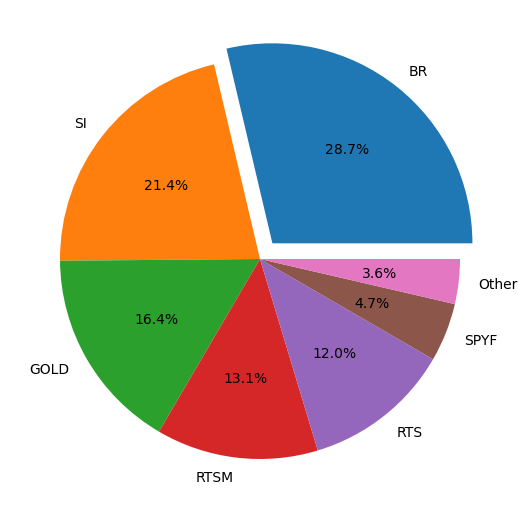

In [75]:
# create pie chart

# improving data only for correct visualization
popular_con = traid_data['NameComtract'].value_counts().nlargest(6).index
con_for_chart = traid_data['NameComtract'].apply(lambda x: x if x in popular_con else 'other')

#make chart
pie_chart = con_for_chart.value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['BR','SI','GOLD','RTSM','RTS','SPYF','Other'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0,0,0,0]
);

In [76]:
# check that info from types of contract direction
#
traid_data['Type'].value_counts(normalize = True)

# group date  to create chart
bar_chart_types = traid_data.groupby(
    ['NameComtract','Type'],
    as_index=False
).count()[['NameComtract','Type','Value']]
display(bar_chart_types)

,NameComtract,Type,Value
0,BR,лонг,76
1,BR,шорт,27
2,ED,лонг,5
3,GAZPROM,лонг,6
4,GAZPROM,шорт,3
5,GOLD,лонг,35
6,GOLD,шорт,24
7,LUKOIL,лонг,5
8,LUKOIL,шорт,3
9,NG,лонг,6


In [77]:
# create chart of direction
fig = px.bar(
    bar_chart_types,
    x = 'NameComtract',
    y = 'Value',
    color = 'Type',
    title="Отношение коротких и длинных позиций",
    text_auto='.2s'# print value on bar 
)
fig.update_layout(barmode='stack')
fig.show()

In [78]:
#acquaintance with data of reasons
traid_data['Reasons'].value_counts()

Take                                                 141
Stop                                                 113
стоп                                                  37
стоп сработал                                         13
БЕЗ СТОПА                                              5
по уровню                                              4
выбило по стопу                                        3
чтоб не маржинкол                                      2
маркет выбило по стопу, стопа не было отрастила        2
брокер принудительно                                   2
уровни                                                 2
Маркет                                                 2
МА 200                                                 2
тейк_Кумо                                              1
тейк_перепонка фигуры                                  1
расчет был на большую шпильку в начале недели          1
контртренд был, по рынку вышла                         1
по рынку                       

In [87]:
# func to cleaning data of reasons
# func to improve names of contract
  
def get_stop(name):
    st_list = ['stop', 'Выбило по стопу','стоп','Stop','стоп сработал',
              'выбило по стопу','шпилтка/экстремум','клиринг снял заявку и стоп сработал',
               'смена тренда','маркет кончился срок'] #create list of stop closed
   
    if name in st_list:
        # if it is stop
        res = 'Stop'
        return res
    else:
        return name    

def get_by_hands(name):
    hn_list = ['закрыл вруную',' Закрыл вручную','hans',
               'закрыл в руччную','hands','БЕЗ СТОПА',
               'маркет выбило по стопу, стопа не было отрастила',
              'расчет был на большую шпильку в начале недели','по рынку',
              'для др. трейда $ нужны были','по рынку, цена долго стоит',
               'контртренд был, по рынку вышла','не понятный рынок',
              'нет тенденции','по рынку',
              'не отращивала, т.к. нужны были деньги на РТС',
              'цели нужно ставить мин. До МА40',
              'пошло снижение, на вариант если это распределение','по рынку МА 40',
              'смена тренда, по рынку','цена наметила на шорт','граница диапазона','по уровню',
              'по рынку','уровни '] #create list of hands closed
   
    if name in hn_list:
        # if it is hands
        res = 'Hands'
        return res
    else:
        return name 
    
def get_take(name):
    tk_list = ['take','тейк',' Тейк','уровни','Маркет','МА 200','МА40','МА200',
              'тейк_Кумо','не внимательно указала цифру выхода',
              'тейк МА40','тейк_перепонка фигуры','т.Вайк.'] #create list of take closed
   
    if name in tk_list:
        # if it is take
        res = 'Take'
        return res
    else:
        return name 
    
def get_margen(name):
    mc_list = ['чтоб не маржинкол','брокер принудительно'] #create list of take closed
   
    if name in mc_list:
        # if it is margen
        res = 'MARGENCALL'
        return res
    else:
        return name 

    
# CALL THIS FUNC LAST, THIS CHANGES MAST BE APPLY AFTER MAIN CLEANING
def get_other(name):
    all_list = ['Take','Hands','Stop','MARGENCALL'] #create list of main reasons
   
    if name in all_list:
        # if it is our certain values
        return name
    else:
        return 'Other'
    
traid_data['Reasons'] = traid_data['Reasons'].apply(get_stop)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_by_hands)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_take)
traid_data['Reasons'] = traid_data['Reasons'].apply(get_margen)

# call to last improve to change last trash on type 'other'
traid_data['Reasons'] = traid_data['Reasons'].apply(get_other)
display(traid_data['Reasons'].value_counts())

Stop          169
Take          153
Hands          27
Other           6
MARGENCALL      4
Name: Reasons, dtype: int64

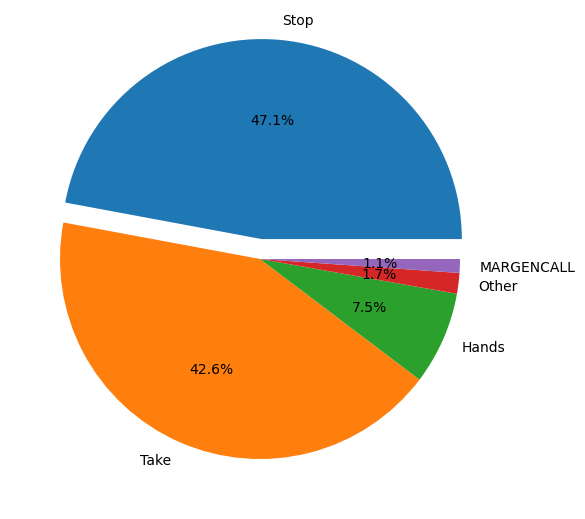

In [89]:
#create chart of reasons of closed
pie_chart = traid_data['Reasons'].value_counts(normalize = True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0 , 0, 1, 1])
axes.pie(
    pie_chart,
    labels= ['Stop','Take','Hands','Other','MARGENCALL'],
    autopct='%.1f%%',
    explode = [0.1, 0,0,0,0]
);

In [90]:
traid_data

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total,MonthSale,YearSale,NameComtract
0,2021-10-07,Si-12.21,лонг,73098.00,1,72544.00,Stop,1,1,-554.00,99446.00,10,2021,SI
1,2021-10-12,Si-12.21,лонг,72831.00,1,72544.00,Stop,1,1,-287.00,99159.00,10,2021,SI
2,2021-10-14,BR-11.21,лонг,83.98,1,84.66,Take,"0,01","7,09",481.94,99640.94,10,2021,BR
3,2021-10-14,GAZR-12.21,лонг,37342.00,2,37518.00,Take,1,1,352.00,99992.94,10,2021,GAZPROM
4,2021-10-15,BR-11.21,лонг,84.77,1,85.79,Hands,"0,01","7,09",722.91,100715.85,10,2021,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-10-28,GOLD-12.22,шорт,1745.00,1,1753.90,Stop,"0,1","6,09",-541.90,23842.26,10,2022,GOLD
355,2022-10-28,GOLD-12.22,шорт,1773.00,1,1771.30,Take,"0,1","6,13",104.23,23946.49,10,2022,GOLD
356,2022-10-28,GOLD-12.22,шорт,1771.00,1,1771.30,Stop,"0,1","6,13",-18.39,23928.10,10,2022,GOLD
357,2022-10-28,GOLD-12.22,шорт,1780.00,1,1780.50,Stop,"0,1","6,13",-30.66,23897.44,10,2022,GOLD


In [97]:
# reserch delta in persent 
#formul:
traid_data['Proportion'] = traid_data.apply(lambda x: (x['Open_price']- x['Close price']) / (x['Open_price']/ 100) , axis = 1)
display(traid_data['Proportion'])

0      0.757887
1      0.394063
2     -0.809717
3     -0.471319
4     -1.203256
         ...   
354   -0.510029
355    0.095883
356   -0.016940
357   -0.028090
358    0.028074
Name: Proportion, Length: 359, dtype: float64

In [99]:
#invert
#traid_data['Proportion'] = traid_data.apply(lambda x: if x['Delta']<0: -x['Proportion']
traid_data['Proportion'] = - (traid_data['Proportion'])
display(traid_data['Proportion'])

0     -0.757887
1     -0.394063
2      0.809717
3      0.471319
4      1.203256
         ...   
354    0.510029
355   -0.095883
356    0.016940
357    0.028090
358   -0.028074
Name: Proportion, Length: 359, dtype: float64

In [100]:
traid_data['Proportion'].describe()

count    359.000000
mean      -0.002765
std        2.769397
min      -16.121776
25%       -0.862203
50%        0.000000
75%        0.938519
max       16.787565
Name: Proportion, dtype: float64

In [102]:
fig = px.scatter(traid_data, x='Date', y='Proportion', trendline= 'ols')
fig.show()

In [103]:
fig = px.box(traid_data, y='Proportion')
fig.show()

In [106]:
# 
n_year = traid_data[traid_data['YearSale']== 2022]
display(n_year)

,Date,Name,Type,Open_price,Value,Close price,Reasons,Step,Step price,Delta,Total,MonthSale,YearSale,NameComtract,Proportion
65,2022-01-07,BR-02.22,лонг,79.32,1,81.98,Take,"0,01","7,65",2034.09,117701.37,1,2022,BR,3.353505
66,2022-01-07,RTS-03-22,лонг,152440.00,1,155590.00,Hands,10,"15,29",4817.59,122518.96,1,2022,RTS,2.066387
67,2022-01-10,RTS-03-22,лонг,157350.00,1,157630.00,Hands,10,"15,04",421.24,122940.20,1,2022,RTS,0.177947
68,2022-01-12,RTS-03-22,шорт,160020.00,1,159760.00,Hands,10,"14,95",388.66,123328.86,1,2022,RTS,-0.162480
69,2022-01-12,BR-02.22,шорт,81.51,1,84.64,Hands,"0,01","7,47",-2336.55,120992.31,1,2022,BR,3.840020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-10-28,GOLD-12.22,шорт,1745.00,1,1753.90,Stop,"0,1","6,09",-541.90,23842.26,10,2022,GOLD,0.510029
355,2022-10-28,GOLD-12.22,шорт,1773.00,1,1771.30,Take,"0,1","6,13",104.23,23946.49,10,2022,GOLD,-0.095883
356,2022-10-28,GOLD-12.22,шорт,1771.00,1,1771.30,Stop,"0,1","6,13",-18.39,23928.10,10,2022,GOLD,0.016940
357,2022-10-28,GOLD-12.22,шорт,1780.00,1,1780.50,Stop,"0,1","6,13",-30.66,23897.44,10,2022,GOLD,0.028090


In [107]:

fig = px.box(n_year,x='MonthSale', y='Proportion')
fig.show()


In [108]:
# group date  to create chart
bar_chart_con = traid_data.groupby(
    ['NameComtract','Type'],
    as_index=False
).mean()[['NameComtract','Type','Proportion']]
display(bar_chart_con)

,NameComtract,Type,Proportion
0,BR,лонг,0.331516
1,BR,шорт,0.856008
2,ED,лонг,-0.385324
3,GAZPROM,лонг,-0.833441
4,GAZPROM,шорт,-3.964420
5,GOLD,лонг,0.057239
6,GOLD,шорт,0.495413
7,LUKOIL,лонг,1.447164
8,LUKOIL,шорт,1.140916
9,NG,лонг,-1.764206


In [109]:
# create chart to work
fig = px.bar(
    bar_chart_con,
    x = 'NameComtract',
    y = 'Proportion',
    color = 'Type',
    title="Средняя отдача по интсрументу",
    text_auto='.2s'# print value on bar 
)
fig.update_layout(barmode='stack')
fig.show()